# DNN Classifier

In [100]:
#imports
import numpy as np
import pandas as pd

import random
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

### Prephare Data

In [155]:
n_points = 1000000

noise = np.random.randn(n_points)
print(noise)

x1 = np.linspace(10,20.0,n_points) + noise
np.random.shuffle(x1) #Shuffle data so X1 and X2 are not correlated
print(x1)

x2= np.linspace(10,20.0,n_points) + 2*noise
print(x2)


[ 0.01287371  0.88318719 -1.23213637 ... -0.42895756 -0.33990147
 -0.2809041 ]
[10.97494998 18.21905653 16.8113808  ... 16.36973791 18.03320414
 11.77537261]
[10.02574741 11.76638438  7.53574726 ... 19.14206488 19.32018706
 19.4381918 ]


In [156]:
#Equation
y_true =  (0.5 * x1) + x1**2 -5*(x2) +2*x1/x2 + 5 + noise
y_true

array([ 83.0104916 , 291.19161202, 261.57911103, ..., 186.72424811,
       244.13898993,  53.28679415])

In [157]:
data = pd.concat([pd.DataFrame(data=x1_data,columns=['X1']),pd.DataFrame(data=x2_data,columns=['X2']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)
data.head()

,X1,X2,Y
0,9.247327,-5.519762,83.010492
1,6.055220,-6.456785,291.191612
2,3.378084,-6.068743,261.579111
3,-4.431267,-4.390808,192.003878
4,-5.232778,-7.630487,153.344843


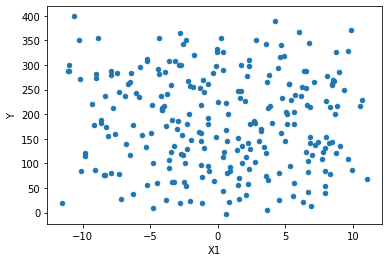

In [158]:
data.sample(n=250).plot(kind='scatter',x='X1',y='Y')

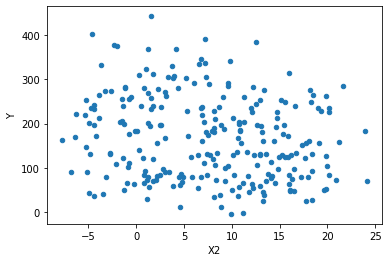

In [159]:
data.sample(n=250).plot(kind='scatter',x='X2',y='Y')

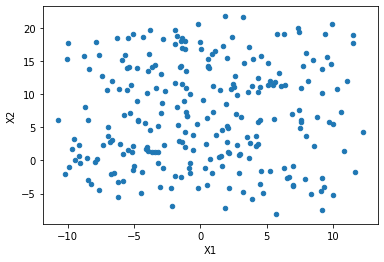

In [160]:
data.sample(n=250).plot(kind='scatter',x='X1',y='X2')

### Fit linear regression model

In [177]:
X = data[['X1','X2']]
Y = data['Y']

In [178]:
#teriible r squared 
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.324
Model:                            OLS   Adj. R-squared (uncentered):              0.324
Method:                 Least Squares   F-statistic:                          2.394e+05
Date:                Sat, 04 Apr 2020   Prob (F-statistic):                        0.00
Time:                        01:08:03   Log-Likelihood:                     -6.5144e+06
No. Observations:             1000000   AIC:                                  1.303e+07
Df Residuals:                  999998   BIC:                                  1.303e+07
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1            -0.0160      0.028     -0.575      0.565      -0.071       0.039
X2            10.6626      0.015    691.995      0.000      10.632      10.693
==============================================================================
Omnibus:                    19004.103   Durbin-Watson:                   0.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11587.299
Skew:                           0.112   Prob(JB):                         0.00
Kurtosis:                       2.522   Cond. No.                         1.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
Y_pred = results.predict(X)

In [180]:
plt.Line2D(Y,Y)

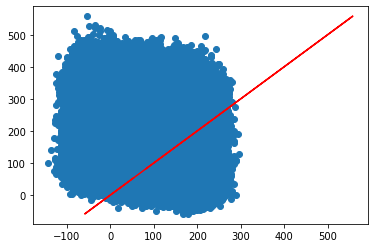

In [181]:
plt.scatter(x = Y_pred, y = Y)
plt.plot(Y, Y,'r')  

### Add transformations and interactions
Suppose we have some domain knowledge...
<br>
y_true =  (0.5 * x1) + X3 -5*(x2) +2*X4 + 5 + noise

In [182]:
data['X3'] = x1**2
data['X4'] = x1/x2

In [183]:
X = data[['X1','X2','X3','X4']]
Y = data['Y']

In [184]:
#teriible r squared 
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          2.827e+07
Date:                Sat, 04 Apr 2020   Prob (F-statistic):                        0.00
Time:                        01:08:20   Log-Likelihood:                     -4.3415e+06
No. Observations:             1000000   AIC:                                  8.683e+06
Df Residuals:                  999996   BIC:                                  8.683e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1            -0.0077      0.003     -2.416      0.016      -0.014      -0.001
X2            -3.1337      0.003  -1241.872      0.000      -3.139      -3.129
X3             0.9702      0.000   3393.392      0.000       0.970       0.971
X4           -24.4237      0.057   -428.917      0.000     -24.535     -24.312
==============================================================================
Omnibus:                    25845.604   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37272.010
Skew:                           0.284   Prob(JB):                         0.00
Kurtosis:                       3.756   Cond. No.                         772.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

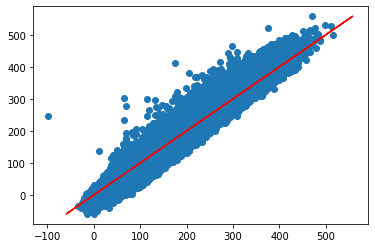

In [185]:
Y_pred = results.predict(X)

plt.scatter(x = Y_pred, y = Y)
plt.plot(Y, Y,'r') 

In [2]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

NameError: name 'feat_cols' is not defined